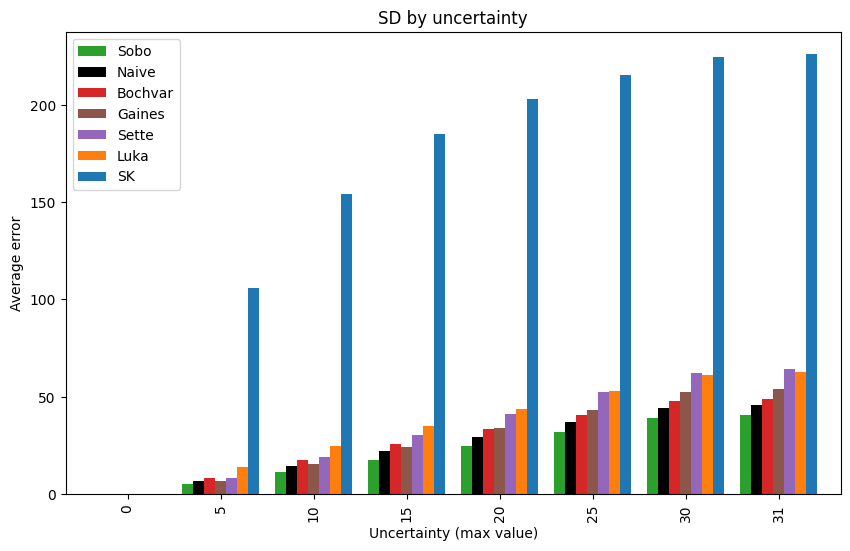

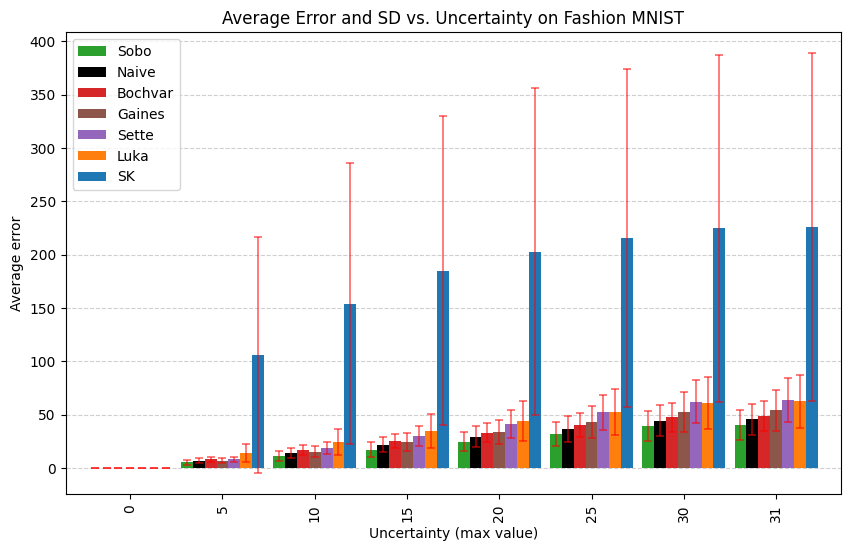

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- load CSV ----
csv_path = "HyTL_convolution_results_on_fashion_mnist_positive_kernels.csv"
df = pd.read_csv(csv_path)

# ---- maps ----
name_map = {
    'Naive': 'Naive',
    'Sobo': 'Sobociński',
    'Bochvar': 'Bochvar external',
    'Gaines': 'Gaines–Rescher',
    'Sette': 'Sette',
    'SK': 'Strong Kleene',
    'Luka': 'Lukasiewicz'
}

style_map = {
    'Naive':   {'color': 'black',  'marker': 'o'},
    'Sobo':    {'color': 'tab:green',   'marker': '^'},
    'Bochvar': {'color': 'tab:red', 'marker': 'D'},   # fixed typo: "oredrange" -> "orange"
    'Gaines':  {'color': 'tab:brown',  'marker': '*'},
    'Sette':   {'color': 'tab:purple', 'marker': 'p'},
    'SK':      {'color': 'tab:blue',    'marker': 's'},   # changed to avoid duplicating Sobo's blue
    'Luka':    {'color': 'tab:orange',  'marker': 'h'}
}


# ---- columns ----
X_COL = "Uncertainty Level"
mean_cols = [c for c in df.columns if c.startswith("Avg Error")]

# Build means table: index=x, columns=adder short names
means = df.set_index(X_COL)[mean_cols].copy()
means.columns = [c.replace("Avg Error ", "") for c in means.columns]


# ---- build std table (same shape & order as means) ----
std_cols = [c for c in df.columns if c.startswith("SD Error")]
stds = df.set_index(X_COL)[std_cols].copy()
stds.columns = [c.replace("SD Error ", "") for c in stds.columns]

# reorder stds to match means order
stds = stds[means.columns]

# ---- ORDER BARS BY ASCENDING MEAN (globally; same order for each uncertainty level) ----
bar_order = means.mean(axis=0).sort_values(ascending=True).index.tolist()
means = means[bar_order]

# ---- colors in the same order ----
colors = [style_map[a]["color"] for a in means.columns]

# ---- plot ----
ax = means.plot(kind="bar", figsize=(10, 6), color=colors, width=.83)

ax.set_xlabel("Uncertainty (max value)")
ax.set_ylabel("Average error")
ax.set_title("SD by uncertainty")

# ---- legend: replace labels with full names, keep legend in the SAME order as plotted ----
handles, labels = ax.get_legend_handles_labels()
labels_full = [name_map.get(lbl, lbl) for lbl in labels]

ax = means.plot(
    kind="bar",
    figsize=(10, 6),
    color=colors,
    width=0.9,
    yerr=stds,
    capsize=3,
    error_kw=dict(ecolor="r", alpha=0.6, lw=1.2, capthick=1.2)

)
ax.set_xlabel("Uncertainty (max value)")
ax.set_ylabel("Average error")
ax.set_title("Average Error and SD vs. Uncertainty on Fashion MNIST")


ax.set_axisbelow(True)

ax.yaxis.grid(True, linestyle='--', alpha=0.6)



#plt.tight_layout()
plt.show()


In [5]:
print(df.columns)
print(df.head())

Index(['Uncertainty Level', 'Avg Error Naive', 'SD Error Naive',
       'Avg Error Sobo', 'SD Error Sobo', 'Avg Error Bochvar',
       'SD Error Bochvar', 'Avg Error Gaines', 'SD Error Gaines',
       'Avg Error Luka', 'SD Error Luka', 'Avg Error Sette', 'SD Error Sette',
       'Avg Error SK', 'SD Error SK'],
      dtype='object')
   Uncertainty Level  Avg Error Naive  SD Error Naive  Avg Error Sobo  \
0                  0         0.000000        0.000000        0.000000   
1                  5         6.738944        2.571670        2.598515   
2                 10        14.311354        5.496470        5.607860   
3                 15        21.919534        8.422982        9.938440   
4                 20        29.276972       11.292086       15.999077   

   SD Error Sobo  Avg Error Bochvar  SD Error Bochvar  Avg Error Gaines  \
0       0.000000           0.000000          0.000000          0.000000   
1       0.988240           8.497943          2.258062          5.966182   
2 